<a href="https://colab.research.google.com/github/Harrisson3/diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
Mean Squared Error: 2900.193628493482
Root Mean Squared Error: 53.85344583676593
R-squared: 0.4526027629719195


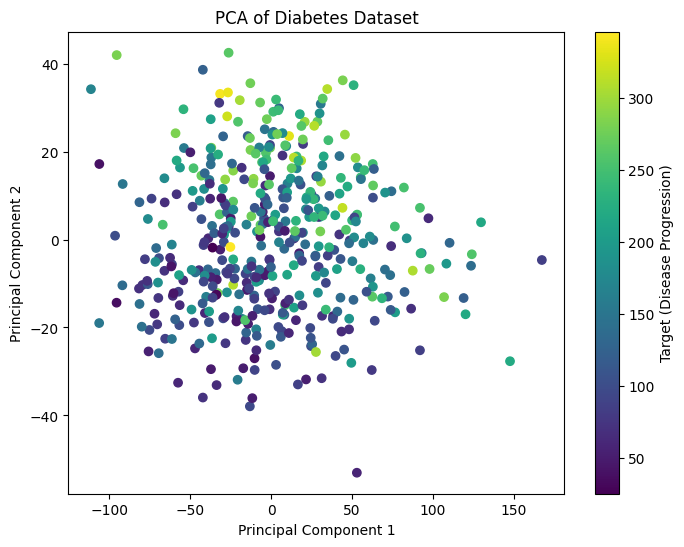

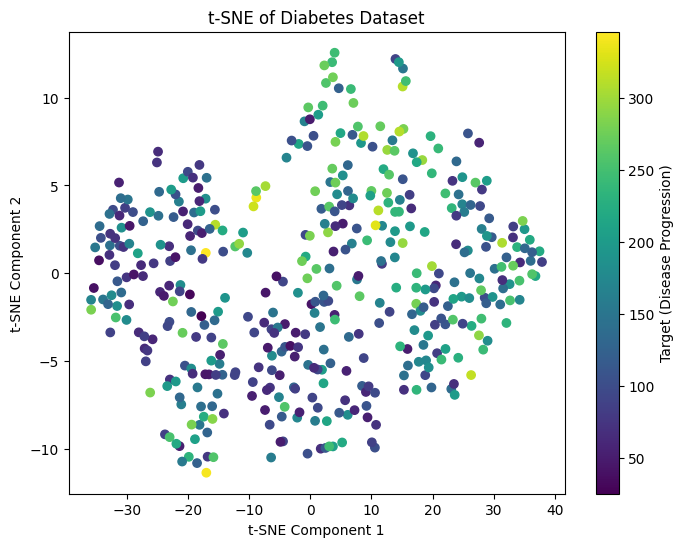

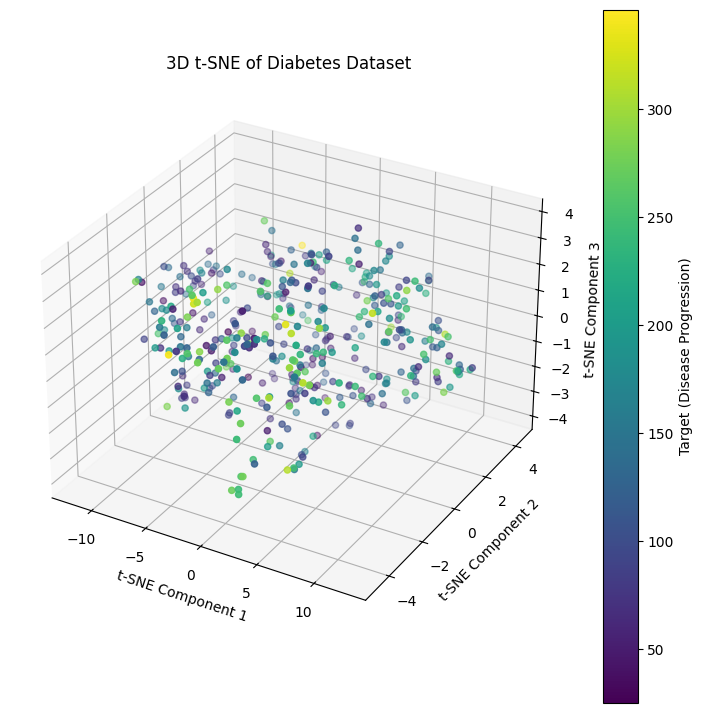

In [11]:
# Step 1: Install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Load the dataset
url = "https://github.com/Harrisson3/diabetes/raw/main/diabetes.xlsx"
df = pd.read_excel(url)

# Display the first few rows to understand the data
print(df.head())

# Step 3: Splitting the data into features and target variable
X = df.drop(columns=['Y'])  # Features (drop the target variable)
y = df['Y']  # Target variable (Y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Step 8: Perform PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target (Disease Progression)')
plt.title("PCA of Diabetes Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 9: Perform t-SNE for further dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target (Disease Progression)')
plt.title("t-SNE of Diabetes Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Step 10: 3D Visualization using t-SNE (n_components=3)
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='viridis')
plt.colorbar(sc, label='Target (Disease Progression)')
ax.set_title("3D t-SNE of Diabetes Dataset")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
plt.show()
